# CLUSTERNIG

#### Se importan las librerías necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import KMeans
from sklearn import datasets

#### Se hace la lectura del dataset y se almacenan en un data frame

In [2]:
data_frame = pd.read_csv("../dataset/wine/winequality-red.csv", sep = ";")

#### Se muestran 5 registros del data frame con el método head

In [3]:
data_frame.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

#### Se muestra el tamaño del data frame

In [4]:
data_frame.shape

(1599, 12)

#### Se grafica el histograma de los datos de la columna de 'quality' del  data frame

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

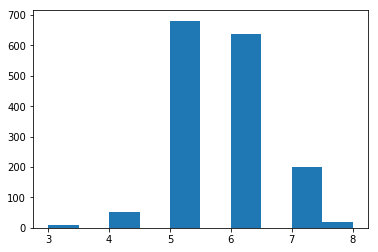

In [5]:
plt.hist(data_frame["quality"])

#### Se hace un grupo con respecto a la columna 'quality' y se calcula la media de cada grupo

In [6]:
data_frame.groupby("quality").mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3             8.360000          0.884500     0.171000        2.635000   
4             7.779245          0.693962     0.174151        2.694340   
5             8.167254          0.577041     0.243686        2.528855   
6             8.347179          0.497484     0.273824        2.477194   
7             8.872362          0.403920     0.375176        2.720603   
8             8.566667          0.423333     0.391111        2.577778   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
3         0.122500            11.000000             24.900000  0.997464   
4         0.090679            12.264151             36.245283  0.996542   
5         0.092736            16.983847             56.513950  0.997104   
6         0.084956            15.711599             40.869906  0.996615   
7         0.076588            14.045226             35.020101  0.996104   
8         0.068444            13.277778             33.444444  0.995212   

               pH  sulphates    alcohol  
quality                                  
3        3.398000   0.570000   9.955000  
4        3.381509   0.596415  10.265094  
5        3.304949   0.620969   9.899706  
6        3.318072   0.675329  10.629519  
7        3.290754   0.741256  11.465913  
8        3.267222   0.767778  12.094444

#### Se hace la nomalización de los datos 

In [7]:
data_frame_norm = (data_frame-data_frame.min())/(data_frame.max()-data_frame.min())

In [8]:
data_frame_norm.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.140845              0.098940  0.567548  0.606299   0.137725   
1             0.338028              0.215548  0.494126  0.362205   0.209581   
2             0.197183              0.169611  0.508811  0.409449   0.191617   
3             0.225352              0.190813  0.582232  0.330709   0.149701   
4             0.140845              0.098940  0.567548  0.606299   0.137725   

    alcohol  quality  
0  0.153846      0.4  
1  0.215385      0.4  
2  0.215385      0.4  
3  0.215385      0.6  
4  0.153846      0.4

## Clustering Jerárquico o Aglomerativo con scikit-learn 

#### Se crea el cluster Jerárquico

In [9]:
cluster = AgglomerativeClustering(n_clusters=6, linkage="ward").fit(data_frame_norm)
cluster

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=6,
            pooling_func=<function mean at 0x000000CDDFD34950>)

#### Se obtiene  las etiquetas de los clusters

In [10]:
md_h = pd.Series(cluster.labels_)

#### Se muestran las etiquetas

In [11]:
md_h

0       2
1       2
2       2
3       3
4       2
5       2
6       2
7       2
8       2
9       1
10      2
11      1
12      4
13      5
14      1
15      1
16      0
17      5
18      2
19      5
20      1
21      1
22      5
23      2
24      1
25      2
26      2
27      5
28      2
29      2
       ..
1569    4
1570    0
1571    4
1572    1
1573    4
1574    1
1575    0
1576    0
1577    4
1578    4
1579    4
1580    0
1581    4
1582    4
1583    1
1584    0
1585    0
1586    0
1587    4
1588    0
1589    1
1590    4
1591    4
1592    4
1593    4
1594    4
1595    4
1596    4
1597    4
1598    0
Length: 1599, dtype: int64

#### Se grafica un histograma de los clusters

Text(0,0.5,'Número de vinos del cluster')

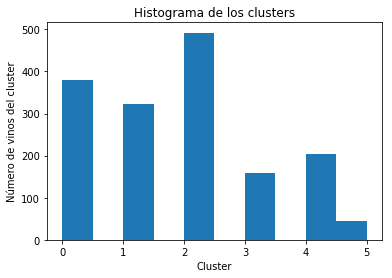

In [12]:
plt.hist(md_h)
plt.title("Histograma de los clusters")
plt.xlabel("Cluster")
plt.ylabel("Número de vinos del cluster")

#### Se muestran los hijos de los clusters

In [13]:
cluster.children_

array([[   0,    4],
       [ 135,  140],
       [ 750,  751],
       ...,
       [3179, 3191],
       [3192, 3193],
       [3194, 3195]], dtype=int64)

#### Se hace la representación del dendrograma

In [14]:
z = linkage(data_frame_norm, "ward")

#### Se grafica el dendrograma

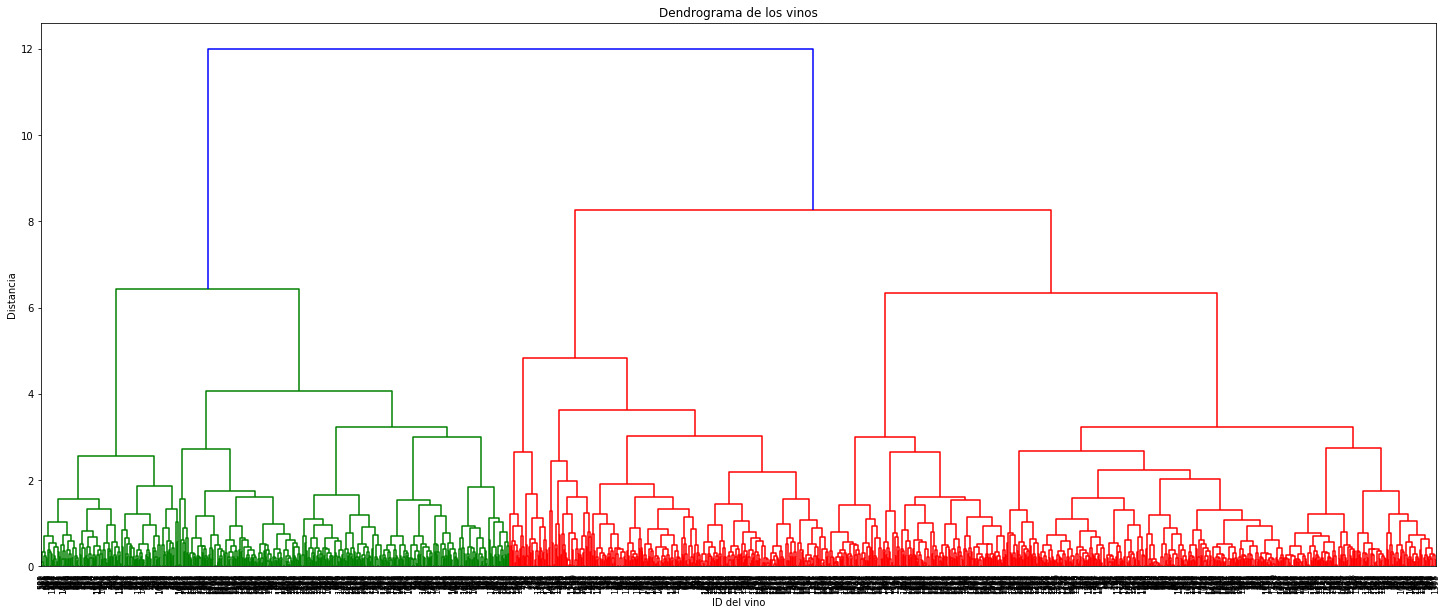

In [15]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma de los vinos")
plt.xlabel("ID del vino")
plt.ylabel("Distancia")
dendrogram(z, leaf_rotation=90, leaf_font_size=8)
plt.show()

## Clustering con K-means

#### Se crea el modelo de K-means para el dataset normalizado 

In [16]:
modelo = KMeans(n_clusters=6)
modelo.fit(data_frame_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### Se muestran las etiquetas

In [17]:
modelo.labels_

array([0, 0, 0, ..., 5, 5, 3])

#### Se obtiene las etiquetas de los clusters

In [18]:
md_k = pd.Series(modelo.labels_) 

#### Se agregan las etiquetas de los clusters al dataframe normalizado

In [19]:
data_frame_norm["cluster_h"] = md_h
data_frame_norm["cluster_k"] = md_k

#### Se muestran 5 registros del data frame con el método head

In [20]:
data_frame_norm.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.140845              0.098940  0.567548  0.606299   0.137725   
1             0.338028              0.215548  0.494126  0.362205   0.209581   
2             0.197183              0.169611  0.508811  0.409449   0.191617   
3             0.225352              0.190813  0.582232  0.330709   0.149701   
4             0.140845              0.098940  0.567548  0.606299   0.137725   

    alcohol  quality  cluster_h  cluster_k  
0  0.153846      0.4          2          0  
1  0.215385      0.4          2          0  
2  0.215385      0.4          2          0  
3  0.215385      0.6          3          4  
4  0.153846      0.4          2          0

#### Se grafica un histograma de los clusters

Text(0,0.5,'Número de vinos del cluster')

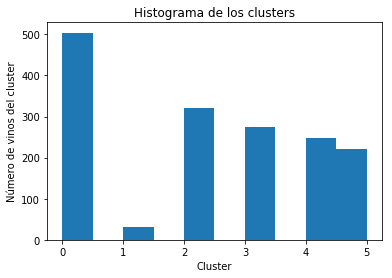

In [21]:
plt.hist(md_k)
plt.title("Histograma de los clusters")
plt.xlabel("Cluster")
plt.ylabel("Número de vinos del cluster")

#### Se muestran los centroides de los clusters

In [22]:
modelo.cluster_centers_

array([[0.26288805, 0.36009866, 0.11775794, 0.09152125, 0.12257864,
        0.14479935, 0.10721297, 0.49071161, 0.48729846, 0.15502329,
        0.22069088, 0.44087302],
       [0.33716814, 0.29223744, 0.48133333, 0.07557078, 0.53789649,
        0.20938967, 0.21071849, 0.5143906 , 0.2335958 , 0.59001996,
        0.16512821, 0.46666667],
       [0.31615802, 0.27819741, 0.30367601, 0.15109034, 0.12690933,
        0.37876793, 0.29641249, 0.53832553, 0.43665219, 0.1784655 ,
        0.21436217, 0.45358255],
       [0.36148029, 0.16073474, 0.41854545, 0.10438356, 0.10601912,
        0.15984635, 0.08353357, 0.41547991, 0.42073014, 0.23560152,
        0.47865734, 0.69090909],
       [0.58242935, 0.20579706, 0.51197581, 0.13400354, 0.13117965,
        0.13908451, 0.09183005, 0.65596431, 0.33194691, 0.22249855,
        0.29185277, 0.54758065],
       [0.17374765, 0.32511002, 0.09027149, 0.09344201, 0.09552875,
        0.25205532, 0.1239787 , 0.32289154, 0.58039691, 0.18600807,
        0.49163476,